In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('145325-imbalanced.txt', sep='\t')
X = df.drop(columns='class')
y = df['class']
df

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat36,stat37,stat38,stat39,stat40,stat41,stat42,stat43,stat44,class
0,0.010978,0.318900,0.207930,0.141530,0.139010,0.083463,0.092000,0.080403,0.055915,0.058585,...,0.309190,0.233770,0.221520,0.26263,0.066897,0.038576,0.024019,0.049885,1.8226,1
1,0.013394,0.333260,0.365490,0.258540,0.161810,0.092784,0.122710,0.067801,0.050625,0.045359,...,0.215230,0.091755,0.197180,0.21564,0.018387,-0.026643,0.015533,0.031936,2.0276,1
2,0.013675,0.322280,0.373680,0.248900,0.151780,0.086832,0.131390,0.063853,0.056063,0.048956,...,0.157320,0.156820,0.245700,0.19724,-0.001143,-0.007267,0.031876,0.015436,1.9598,1
3,0.012200,0.414780,0.369710,0.154130,0.089679,0.100940,0.081194,0.084979,0.036231,0.048660,...,0.294970,0.286910,0.231220,0.28007,0.065373,0.033993,0.033142,0.048213,1.8765,1
4,0.010793,0.450310,0.205070,0.169490,0.121110,0.095015,0.071193,0.063344,0.051665,0.036671,...,0.201680,0.072821,0.174240,0.17292,0.020694,-0.024602,0.004848,0.016044,1.9610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.013240,0.471060,0.253010,0.127360,0.078874,0.087454,0.102490,0.073008,0.079417,0.087409,...,0.115670,0.116580,0.080736,0.11492,-0.033566,-0.029318,-0.052925,-0.032132,1.9884,1
9996,0.012973,0.340550,0.143830,0.072468,0.091631,0.120440,0.123060,0.091180,0.074515,0.045189,...,0.091882,0.190750,0.104280,0.16871,-0.050261,0.001528,-0.045598,-0.003590,1.7271,1
9997,0.013116,0.358470,0.155020,0.059876,0.098557,0.119330,0.131340,0.092394,0.074525,0.044331,...,0.093987,0.116640,0.105720,0.11276,-0.050038,-0.035714,-0.046760,-0.040966,1.9983,1
9998,0.011847,0.133280,0.067265,0.034692,0.031819,0.025555,0.060184,0.044415,0.036232,0.033204,...,0.214190,0.177740,0.228380,0.20755,-0.014932,-0.027690,-0.009701,-0.017035,1.5415,1


 Na podstawie wizualizacji można wywnioskować, że dane będą trudne dla klasyfikatorów KNN i SVM, dlatego że metoda KNN jest wrażliwa na lokalną gęstość danych i może nie poradzić sobie z klasyfikacją mniej licznej klasy. Dla SVM z kolei problemem jest trudna do znalezienia granica decyzyjna (dane z obu klas "nachodzą na siebie").

In [3]:
df['class'].value_counts()

class
1    9699
0     301
Name: count, dtype: int64

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,max_el,diff,diffplus,diffminus,std,diff/std**0.2,diff/std**0.6,diff/std**1,diff/std**1.4,diff/std**2,maxmiddle,similarwindow_4.0,similarwindow_4.1,similarwindow_4.2,similarwindow_4.3,stat0,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,stat10,stat11,stat12,stat13,stat14,stat15,stat16,stat17,stat18,stat19,stat20,stat21,stat22,stat23,stat24,stat25,stat26,stat27,stat28,stat29,stat30,stat31,stat32,stat33,stat34,stat35,stat36,stat37,stat38,stat39,stat40,stat41,stat42,stat43,stat44,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.009386,0.155603,0.162617,0.158203,0.144066,0.131413,0.139049,0.139528,0.131755,0.109362,0.091423,0.093310,0.047416,0.038717,0.038022,0.030189,0.030044,0.248882,0.043288,0.021724,-0.021564,0.035572,0.052142,0.076598,0.112736,0.158110,0.173430,0.599469,0.110659,0.163054,0.190587,0.213255,0.045097,0.044187,0.043139,0.041330,0.037584,0.039772,0.038086,0.036200,0.030532,0.025599,0.027176,0.011235,0.007442,0.007290,0.005403,0.005393,0.238345,0.242026,0.237736,0.241823,0.002606,0.006518,0.005495,0.011305,0.010669,0.012371,0.015101,0.015469,0.015728,0.014649,0.015566,0.010142,0.002752,0.000259,-0.000403,0.003030,0.246627,0.243566,0.245312,0.255481,0.038848,0.037613,0.038057,0.046101,1.621083,0.969900
std,0.003633,0.107339,0.087586,0.077742,0.093255,0.085081,0.090427,0.094634,0.096199,0.086575,0.079730,0.080937,0.046603,0.052639,0.052277,0.050055,0.053678,0.121554,0.049275,0.032696,0.023970,0.012587,0.055789,0.073330,0.099161,0.133026,0.149970,0.133565,0.049035,0.112065,0.127768,0.145696,0.037839,0.032103,0.030116,0.036436,0.034731,0.036443,0.036054,0.036313,0.032943,0.030663,0.031373,0.014290,0.013000,0.012825,0.011235,0.012387,0.051410,0.052442,0.049070,0.046124,0.100499,0.099923,0.100295,0.099707,0.100218,0.100756,0.100138,0.100456,0.100470,0.100540,0.101682,0.103308,0.103437,0.103848,0.103433,0.104009,0.169936,0.172163,0.169487,0.171867,0.073201,0.074608,0.073201,0.090620,0.323680,0.170871
min,0.003103,0.004497,0.003967,0.002550,0.001418,0.002412,0.003742,0.003527,0.003167,0.001596,0.002157,0.003568,0.004764,0.005802,0.005272,0.002346,0.001140,0.066297,0.000000,0.000000,-0.280020,0.012956,0.000000,0.000000,0.000000,0.000000,0.000000,0.118750,0.005247,0.004825,0.006692,0.006061,0.000212,0.000115,0.000069,0.000068,0.000212,0.000109,0.000056,0.000033,0.000079,0.000020,0.000036,0.000036,0.000010,0.000018,0.000006,0.000010,0.005969,0.018069,0.015900,0.032067,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.178140,-0.179580,-0.175160,-0.172530,-0.058272,-0.058674,-0.057290,-0.055798,0.373480,0.000000
25%,0.006766,0.090855,0.107455,0.112318,0.082740,0.077773,0.082916,0.077284,0.063326,0.042478,0.033427,0.030980,0.015708,0.016974,0.016497,0.008523,0.005296,0.165673,0.016612,0.004028,-0.027712,0.026593,0.021399,0.034157,0.053041,0.075809,0.081613,0.515620,0.080

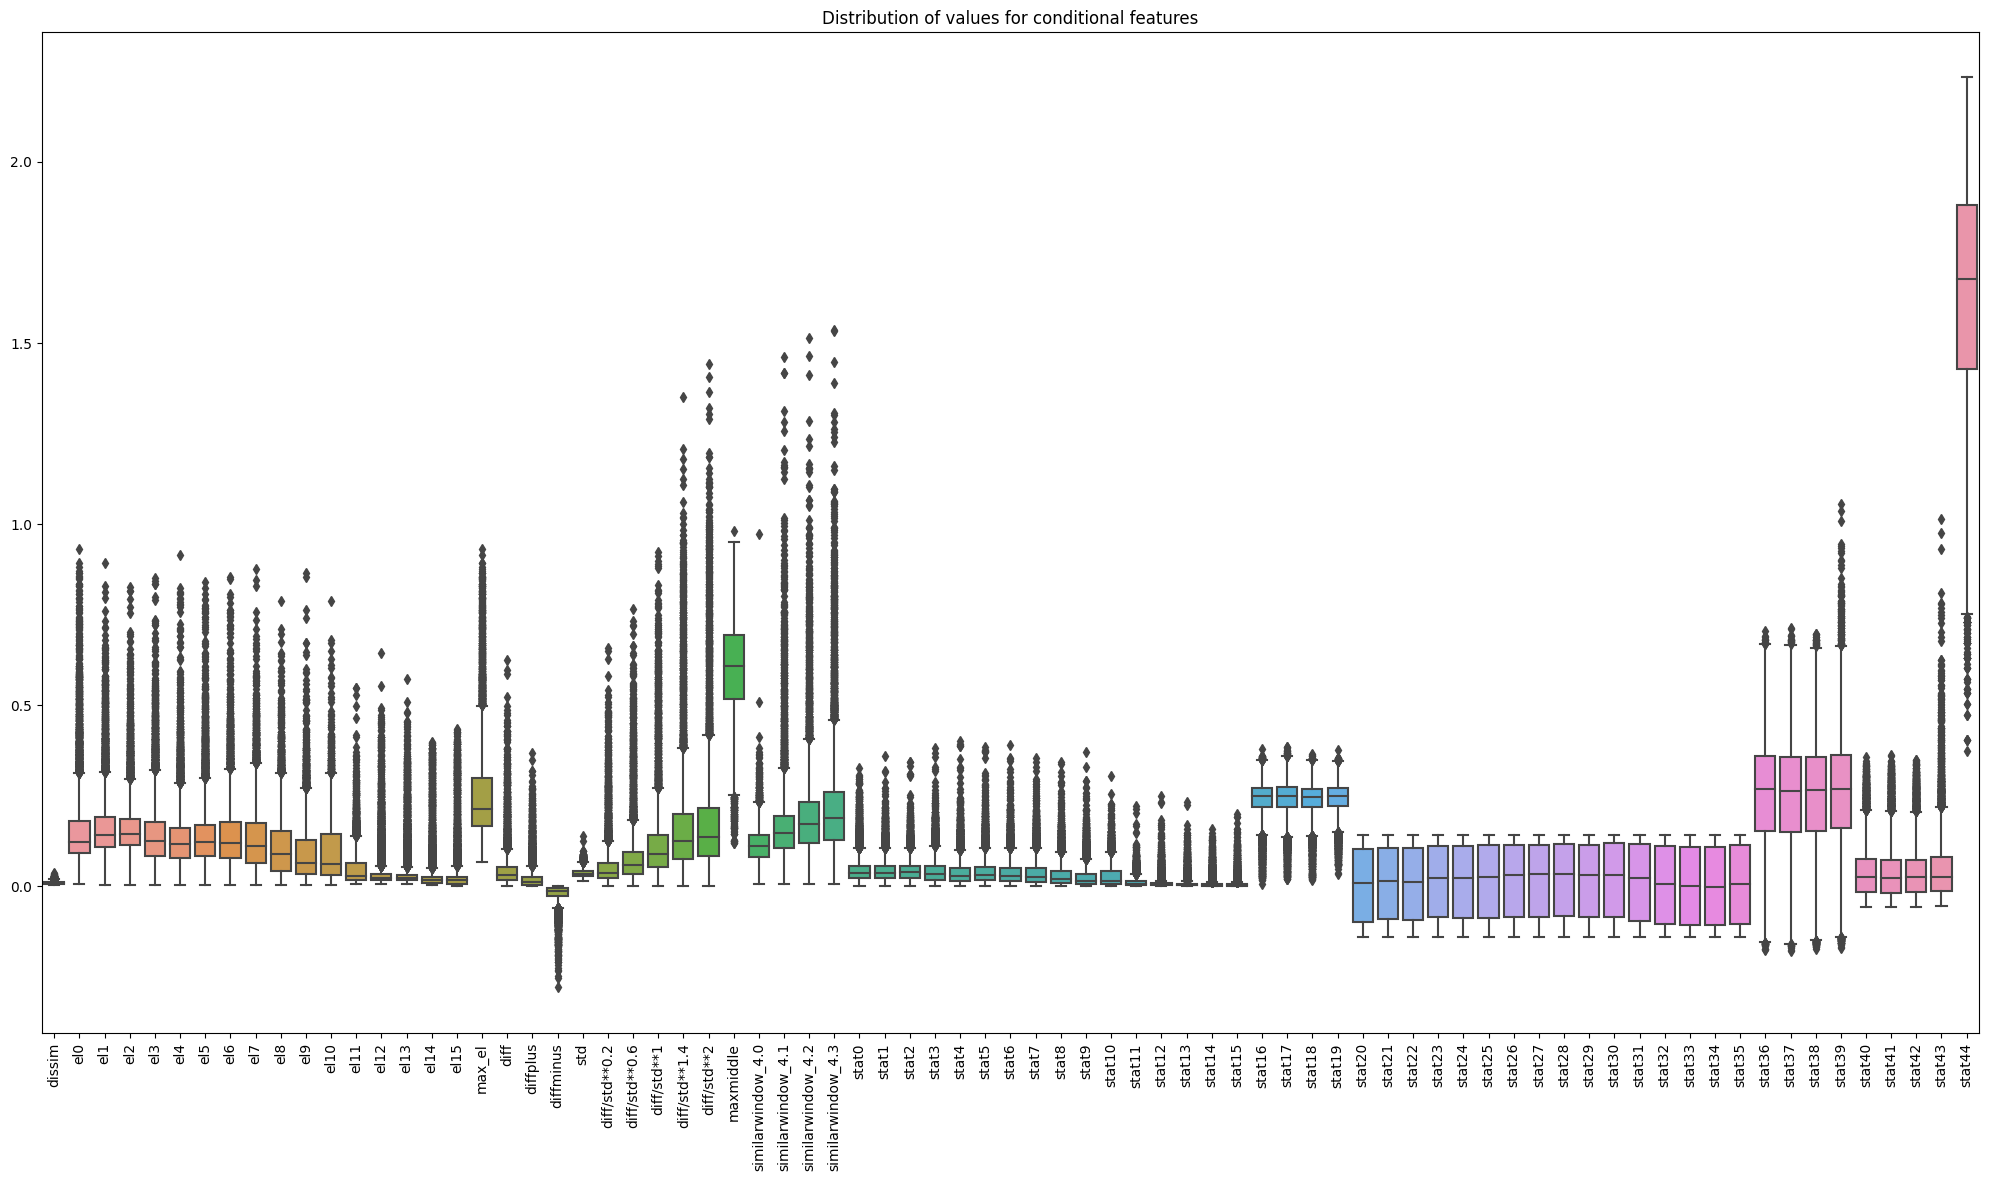

In [5]:
plt.subplots(figsize=(25, 13), facecolor=(1, 1, 1))
sns.boxplot(data=df.drop(columns='class'))
plt.xticks(rotation=90)
plt.title('Distribution of values for conditional features')
plt.savefig('wykres_pudelkowy_zadanie_1.png')

In [45]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.metrics import geometric_mean_score
dummy_clf = DummyClassifier(strategy="most_frequent")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(geometric_mean_score(y_train, y_pred))

0.9686666666666667
0.0


In [6]:
from sklearn.decomposition import PCA
import plotly.express as px
from imblearn.over_sampling import SMOTE

[0.520725  0.1600625]


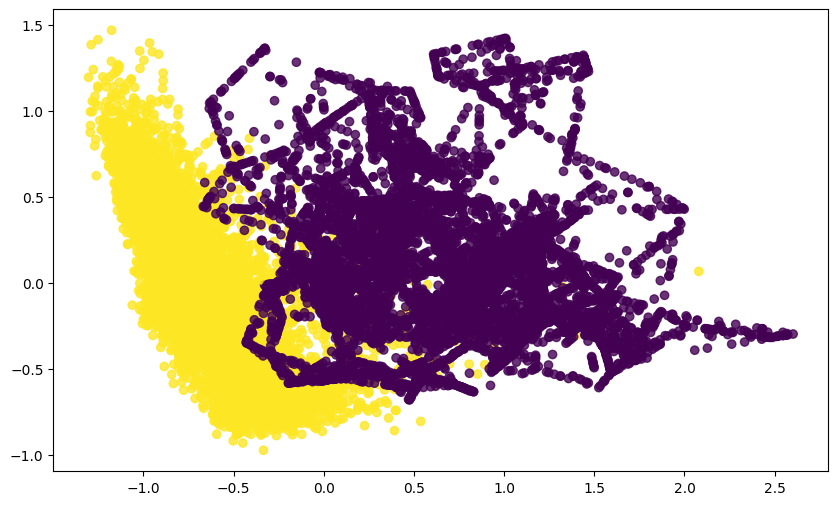

In [7]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)
print(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.scatter(*X_pca.T, c=y_res, alpha=0.8)
plt.savefig('wykres_pca_2d_oversampling_zadanie_2.png')

In [8]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
fig = px.scatter_3d(X_pca, x=0, y=1, z=2, color=y)
fig.update_traces(marker=dict(size=2))
fig.show()
fig.write_html('wykres_pca_3d_zadanie_2.html')

[0.3728315  0.11875514 0.07796177]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, Normalizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [27]:
classes = [KNeighborsClassifier, RandomForestClassifier, SVC,
           MLPClassifier, GaussianNB, QuadraticDiscriminantAnalysis]
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = []
for cls in classes:
    for tr_idx, te_idx in fold.split(X, y):
        X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
        y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]
        # scaler = StandardScaler()
        # X_tr = scaler.fit_transform(X_tr)
        # X_te = scaler.transform(X_te)
        model = cls()
        model.fit(X_tr, y_tr)
        y_pr = model.predict(X_te)
        res += [dict(name=cls.__name__,
                     acc=accuracy_score(y_te, y_pr),
                     gmean=geometric_mean_score(y_te, y_pr),
                     rocauc=roc_auc_score(y_te, y_pr))]

res = pd.DataFrame(res)
res
print(res[res['name'] == 'KNeighborsClassifier'].groupby('name').mean())

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mic

                         acc     gmean    rocauc
name                                            
KNeighborsClassifier  0.9906  0.873404  0.882526


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning:

Variables are collinear

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning:

Variables are collinear



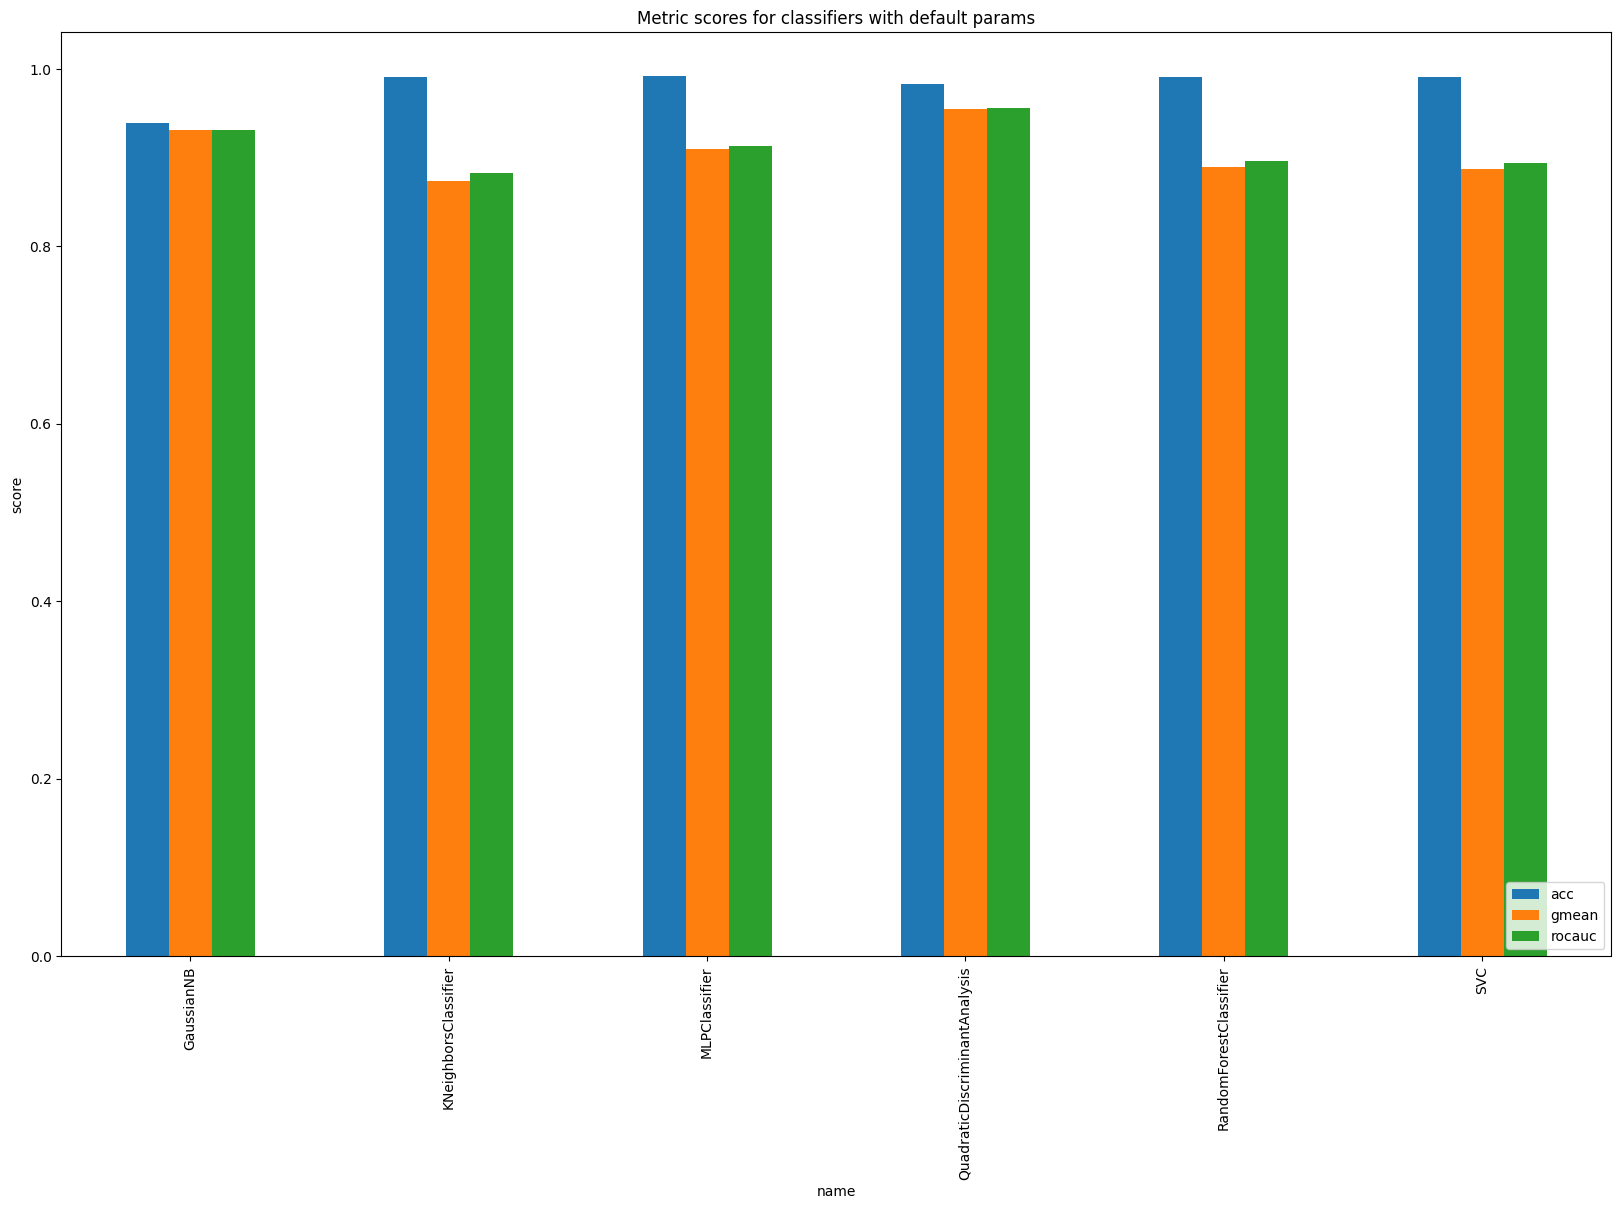

In [51]:
fig, ax = plt.subplots(figsize=(20, 12))
res.groupby('name').mean().plot.bar(ax=ax)
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('Metric scores for classifiers with default params')
plt.savefig('wartosci_metryk_domyslne_zadanie_4.png')

In [33]:
classes = [KNeighborsClassifier, RandomForestClassifier, SVC,
           MLPClassifier, GaussianNB, QuadraticDiscriminantAnalysis]
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = []
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_res, y_res = pipeline.fit_resample(X, y)
for cls in classes:
    for tr_idx, te_idx in fold.split(X_res, y_res):
        X_tr, X_te = X_res.loc[tr_idx], X_res.loc[te_idx]
        y_tr, y_te = y_res.loc[tr_idx], y_res.loc[te_idx]
        # scaler = StandardScaler()
        # X_tr = scaler.fit_transform(X_tr)
        # X_te = scaler.transform(X_te)
        
        model = cls()
        model.fit(X_tr, y_tr)
        y_pr = model.predict(X_te)
        res += [dict(name=cls.__name__,
                     acc=accuracy_score(y_te, y_pr),
                     gmean=geometric_mean_score(y_te, y_pr),
                     rocauc=roc_auc_score(y_te, y_pr))]

res = pd.DataFrame(res)
res

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\mic

,name,acc,gmean,rocauc
0,KNeighborsClassifier,0.982818,0.987029,0.987113
1,KNeighborsClassifier,0.986254,0.989637,0.989691
2,KNeighborsClassifier,0.972509,0.971646,0.971649
3,KNeighborsClassifier,0.979381,0.984415,0.984536
4,KNeighborsClassifier,0.979381,0.981928,0.981959
5,KNeighborsClassifier,0.975945,0.976801,0.976804
6,KNeighborsClassifier,0.979381,0.981928,0.981959
7,KNeighborsClassifier,0.968966,0.971524,0.971556
8,KNeighborsClassifier,0.996552,0.994832,0.994845
9,KNeighborsClassifier,0.982759,0.984469,0.984482


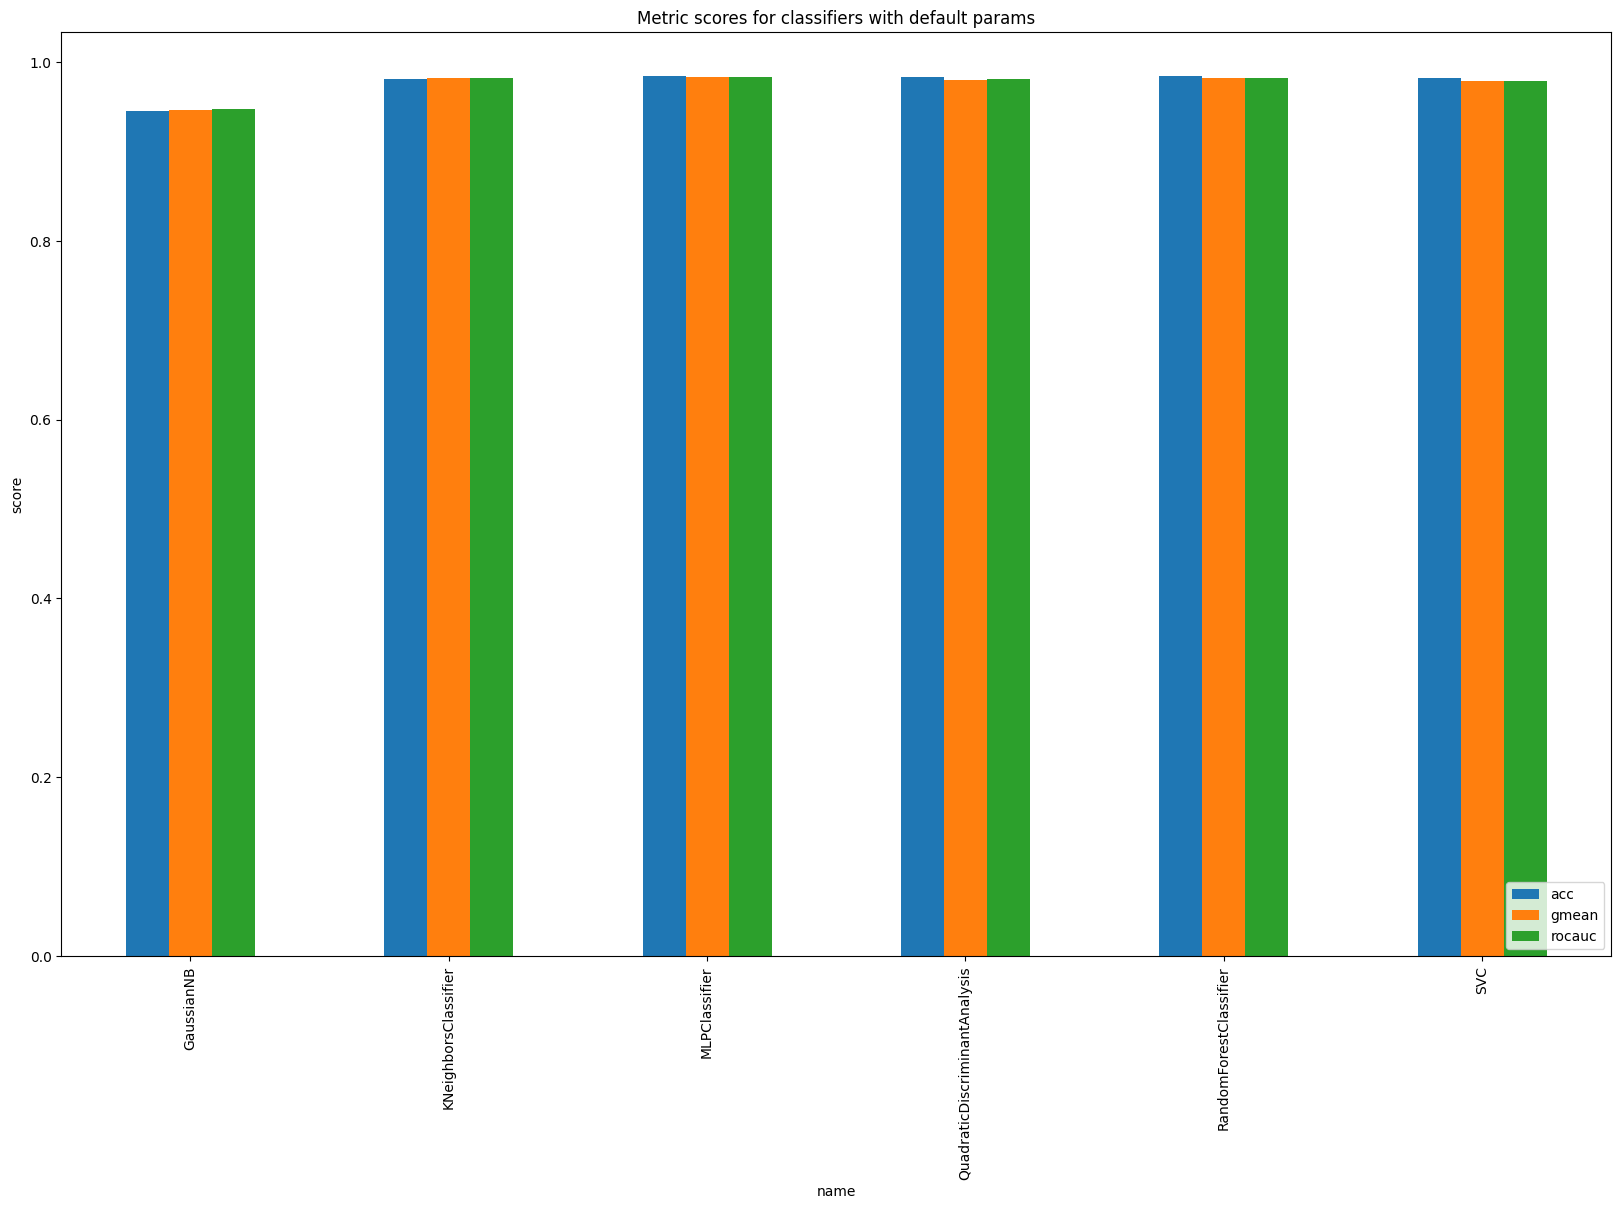

In [34]:
fig, ax = plt.subplots(figsize=(20, 12))
res.groupby('name').mean().plot.bar(ax=ax)
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('Metric scores for classifiers with default params')
plt.savefig('wartosci_metryk_domyslne_po_probkowaniu_zadanie_4.png')

In [60]:
classes = [KNeighborsClassifier, RandomForestClassifier, SVC,
           MLPClassifier, GaussianNB, QuadraticDiscriminantAnalysis]
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res2 = []
for cls in classes:
    for tr_idx, te_idx in fold.split(X, y):
        X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
        y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_te = scaler.transform(X_te)
        model = cls()
        model.fit(X_tr, y_tr)
        y_pr = model.predict(X_te)
        res2 += [dict(name=cls.__name__,
                     acc=accuracy_score(y_te, y_pr),
                     gmean=geometric_mean_score(y_te, y_pr),
                     rocauc=roc_auc_score(y_te, y_pr))]

res2 = pd.DataFrame(res2)
res2

,name,acc,gmean,rocauc
0,KNeighborsClassifier,0.990,0.836229,0.849485
1,KNeighborsClassifier,0.991,0.874692,0.882302
2,KNeighborsClassifier,0.993,0.911929,0.915636
3,KNeighborsClassifier,0.991,0.874692,0.882302
4,KNeighborsClassifier,0.997,0.965594,0.966151
5,KNeighborsClassifier,0.989,0.816076,0.832818
6,KNeighborsClassifier,0.991,0.855907,0.866151
7,KNeighborsClassifier,0.991,0.874692,0.882302
8,KNeighborsClassifier,0.991,0.855907,0.866151
9,KNeighborsClassifier,0.989,0.841554,0.853807


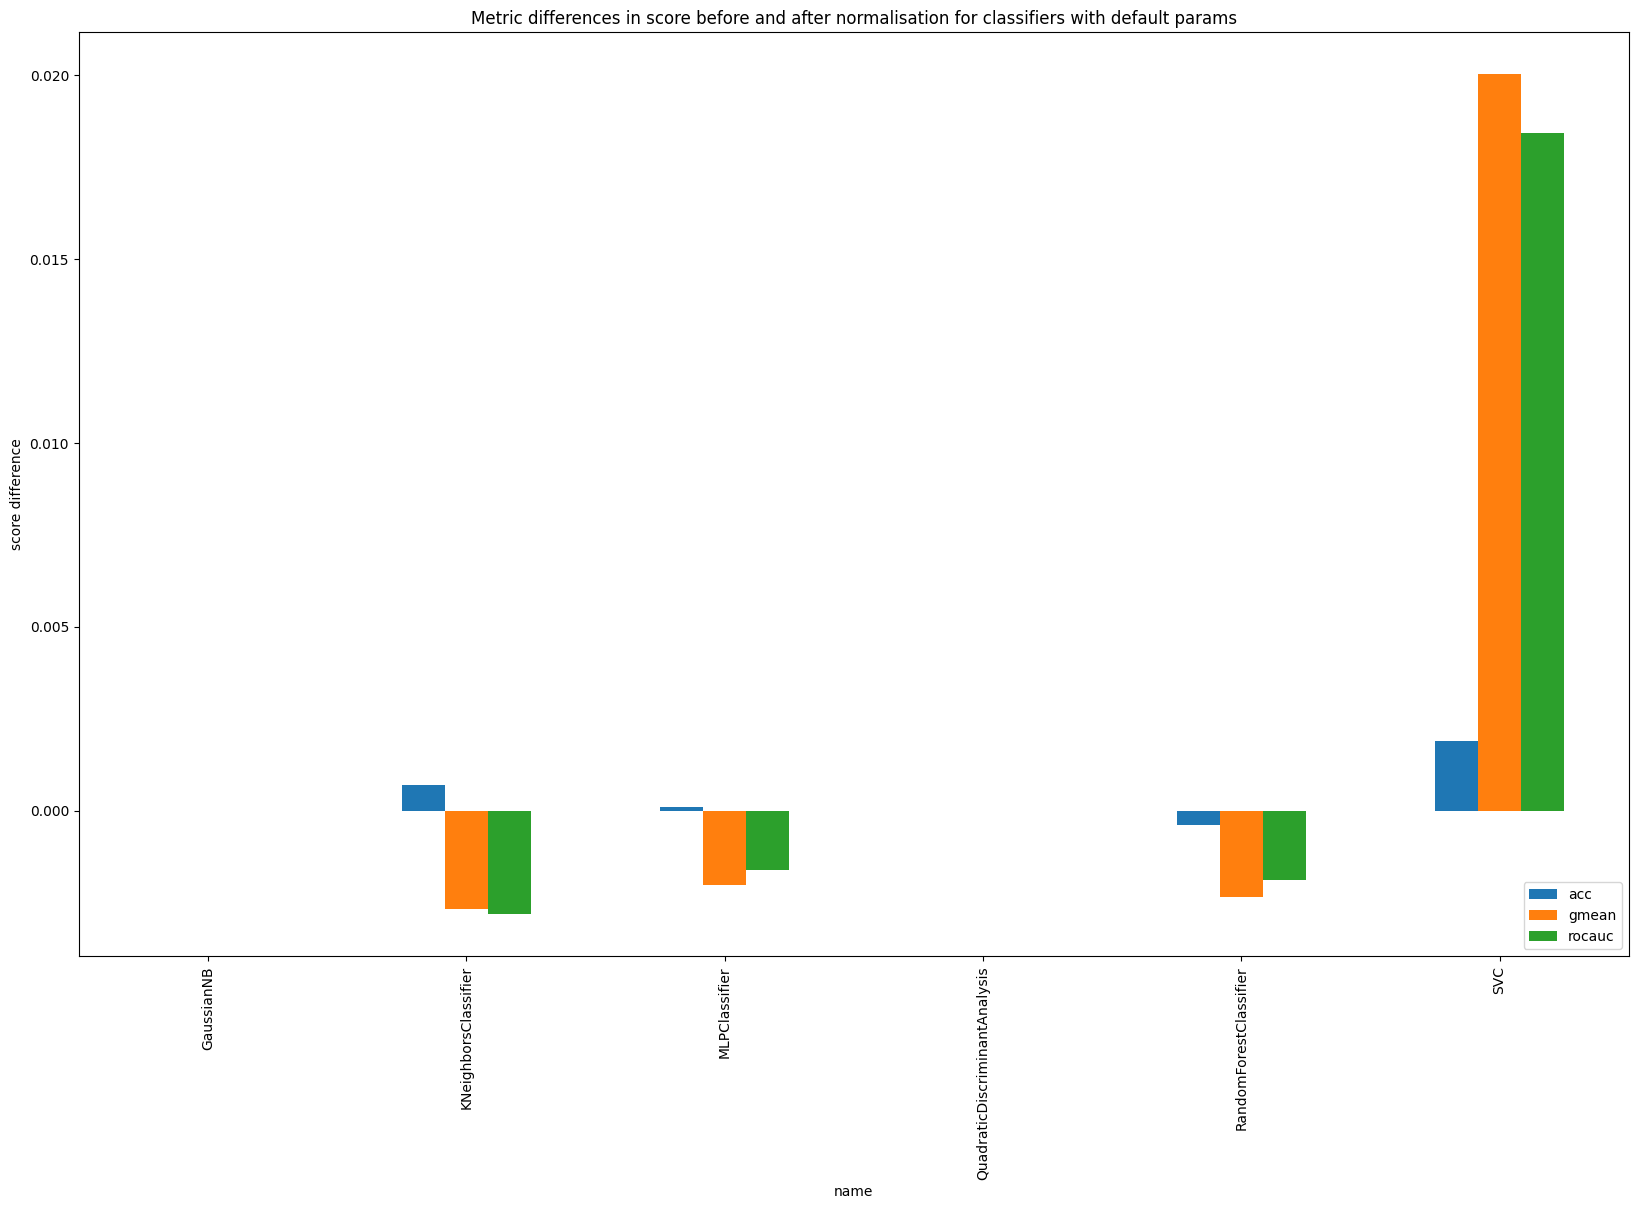

In [62]:
fig, ax = plt.subplots(figsize=(20, 12))
(res2.groupby('name').mean() - res.groupby('name').mean()).plot.bar(ax=ax)
plt.ylabel('score difference')
plt.legend(loc='lower right')
plt.title('Metric differences in score before and after normalisation for classifiers with default params')
plt.savefig('roznice_standaryzacja_zadanie_5.png')

In [38]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
grid = dict(
    n_neighbors=[3, 5, 7, 9, 11, 13, 15, 25, 30]
)

In [15]:
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []
scores = []

for tr_idx, te_idx in fold.split(X, y):
    X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
    y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)
    gs_knn = GridSearchCV(KNeighborsClassifier(),
                          param_grid=grid,
                          cv=10,
                          refit='rocauc',
                          scoring=dict(
                            acc=make_scorer(accuracy_score),
                            rocauc=make_scorer(roc_auc_score),
                            gmean=make_scorer(geometric_mean_score)
                          ))
    res = gs_knn.fit(X_tr, y_tr)
    y_pr = gs_knn.predict(X_te)
    results += [res]
    scores += [dict(acc=accuracy_score(y_te, y_pr),
                    gmean=geometric_mean_score(y_te, y_pr),
                    rocauc=roc_auc_score(y_te, y_pr))]

In [16]:
pd.DataFrame(scores).mean()

acc       0.991300
gmean     0.872355
rocauc    0.881218
dtype: float64

In [26]:
print(res)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 25, 30]},
             refit='rocauc',
             scoring={'acc': make_scorer(accuracy_score),
                      'gmean': make_scorer(geometric_mean_score),
                      'rocauc': make_scorer(roc_auc_score)})


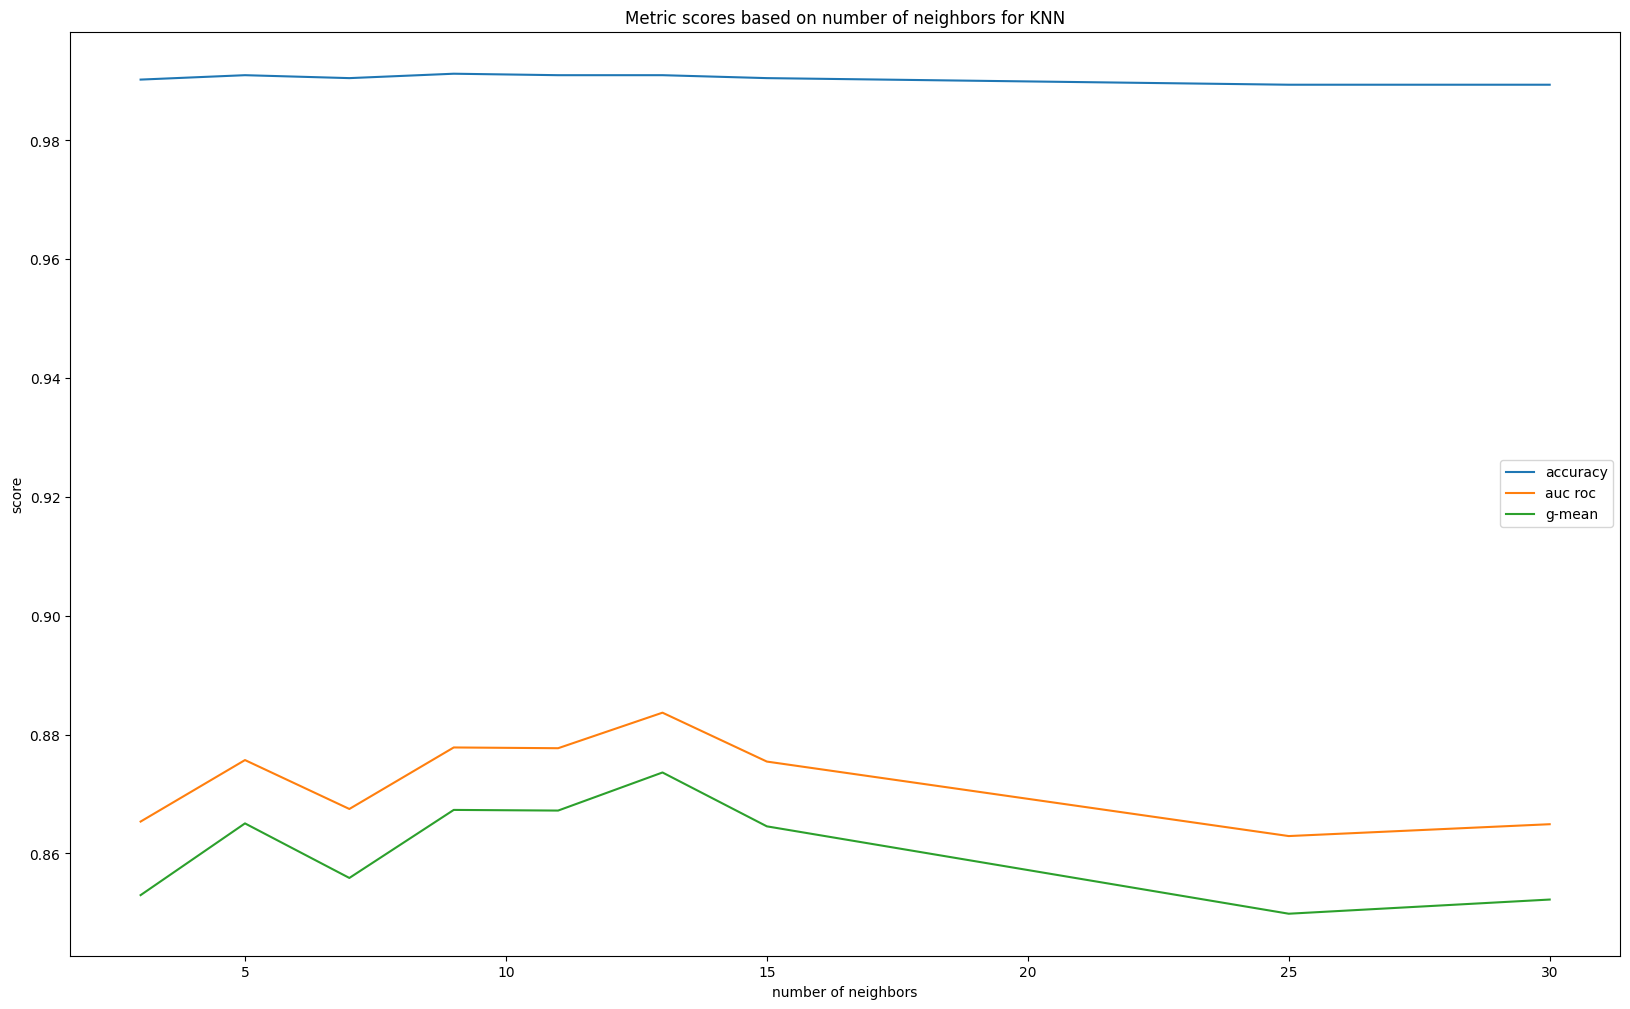

In [36]:
xs = grid['n_neighbors']
plt.figure(figsize=(20, 12))
plt.plot(xs, np.array([results[0].cv_results_[f'split{i}_test_acc'] for i in range(9)]).mean(0), label='accuracy')
plt.plot(xs, np.array([results[0].cv_results_[f'split{i}_test_rocauc'] for i in range(9)]).mean(0), label='auc roc')
plt.plot(xs, np.array([results[0].cv_results_[f'split{i}_test_gmean'] for i in range(9)]).mean(0), label='g-mean')
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.title('Metric scores based on number of neighbors for KNN')
plt.legend()
plt.savefig('wykres_strojenia_knn_zadanie_6.png')

In [37]:
print(len(results))
print(np.array([results[0].cv_results_[f'split{i}_test_rocauc'] for i in range(9)]).mean(0))

10
[0.86536422 0.87571592 0.86748547 0.87783717 0.8777099  0.88369182
 0.87546137 0.86292478 0.86491876]


122.87413307622028


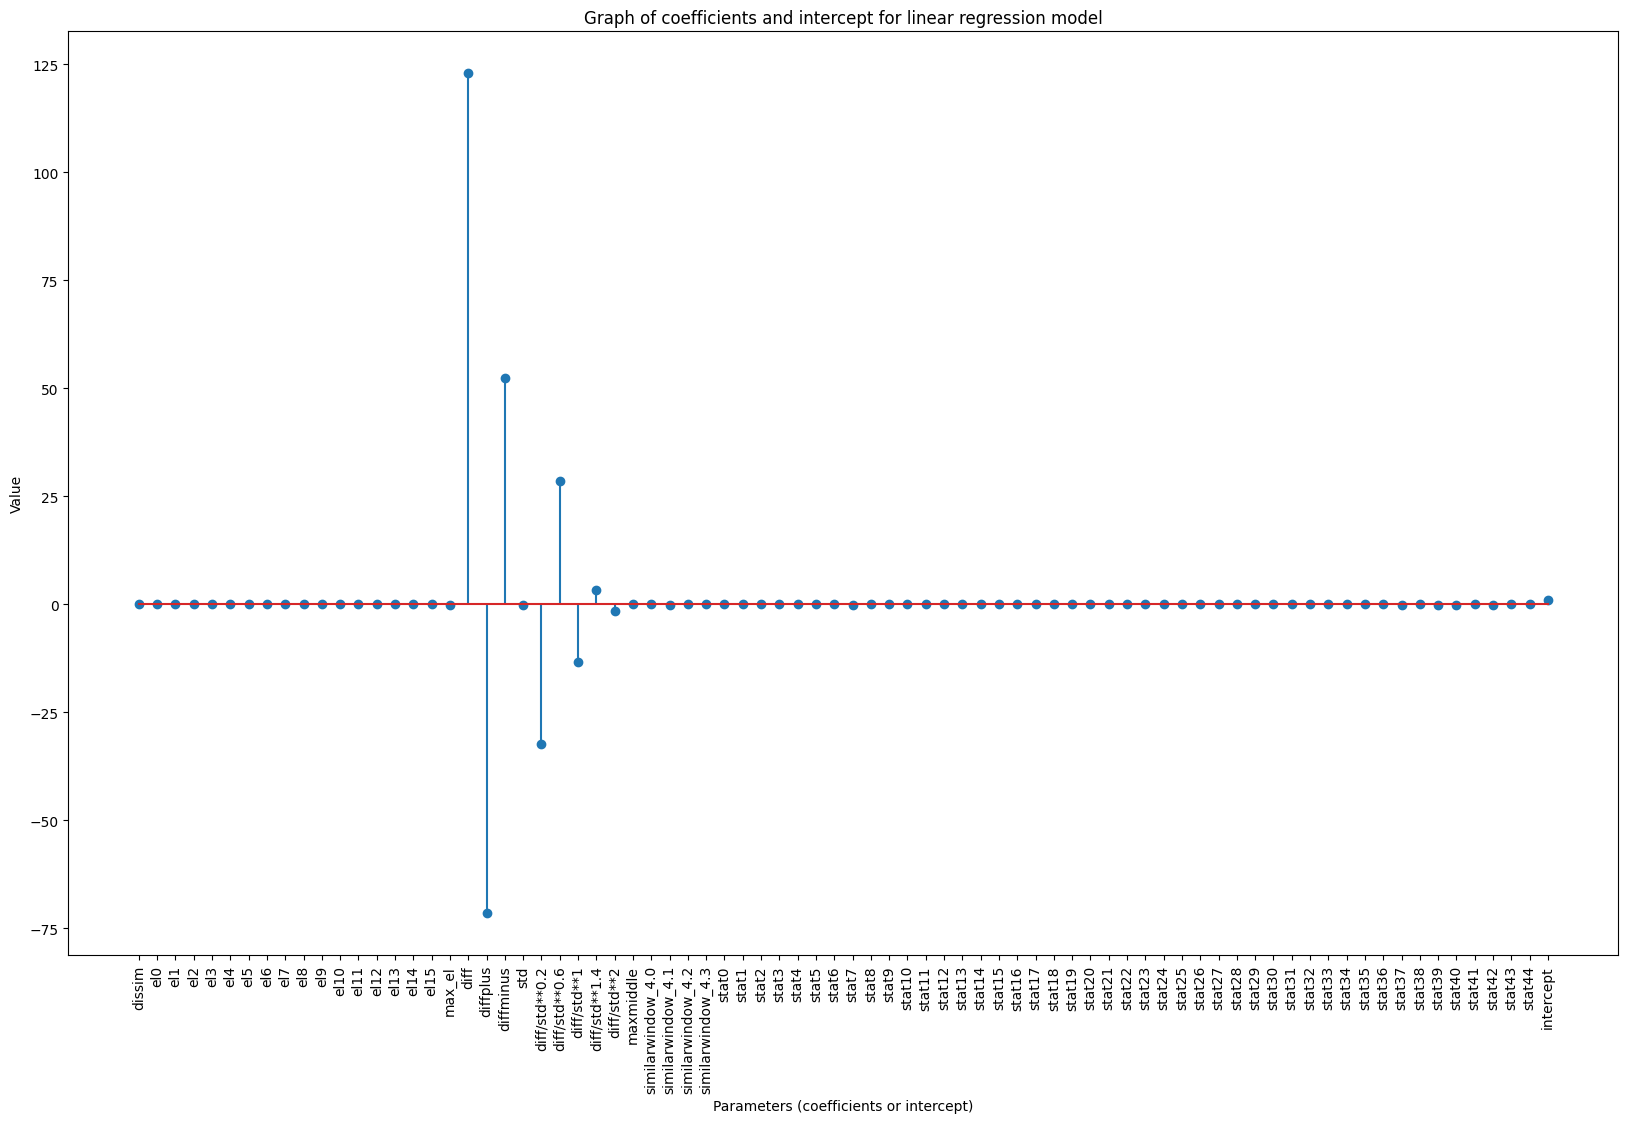

In [47]:
linear_model = LinearRegression()
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)
linear_model.fit(X_tr, y)

plt.figure(figsize=(20, 12))
plt.stem(list(df.columns[:-1]) + ['intercept'], list(linear_model.coef_) + [linear_model.intercept_])
print(linear_model.coef_[18] - linear_model.coef_[2])
plt.title('Graph of coefficients and intercept for linear regression model')
plt.xlabel('Parameters (coefficients or intercept)')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.savefig('wyjasnienie_istotnosci_klasyfikacji_atrybutow_zadanie_7.png')

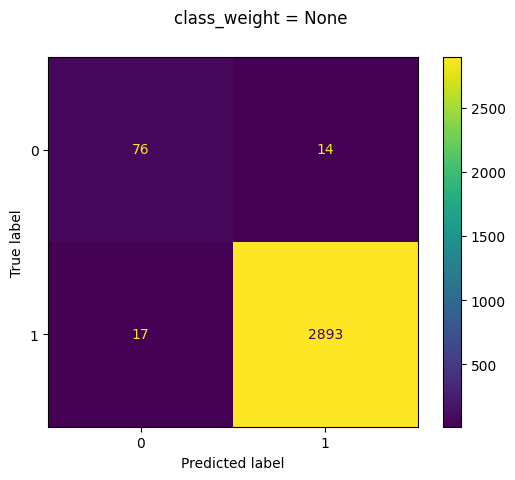

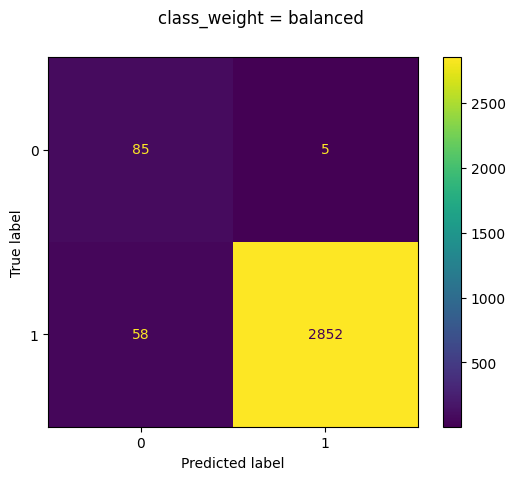

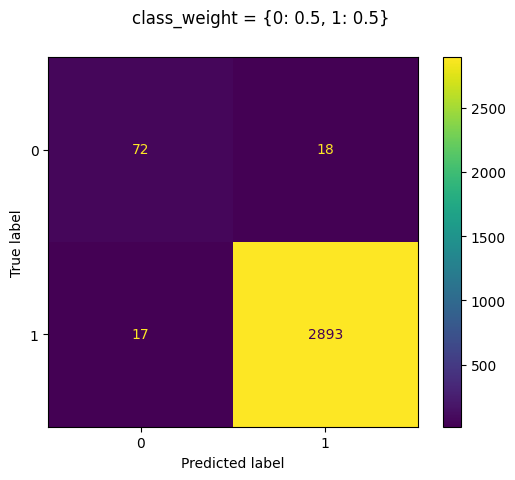

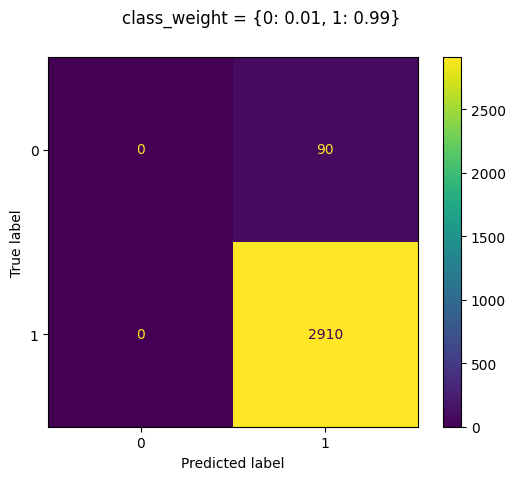

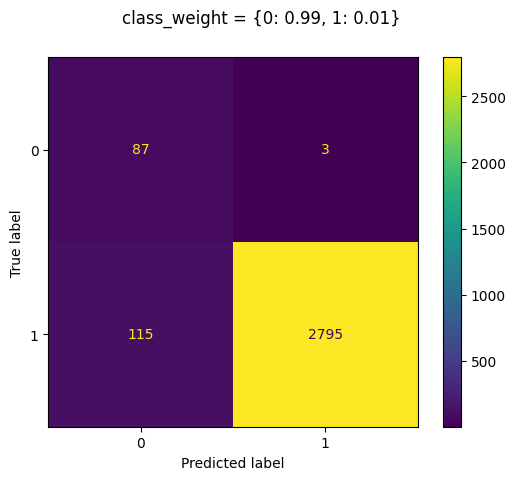

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

for w in [None, 'balanced', {0:0.5,1:0.5}, {0:0.01,1:0.99}, {0:0.99,1:0.01}]:
    svc_model = SVC(class_weight=w)
    svc_model.fit(X_tr, y_tr)
    y_pr = svc_model.predict(X_te)
    cm = confusion_matrix(y_te, y_pr, labels=svc_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
    disp.plot()
    plt.suptitle(f'class_weight = {w}')
    if type(w) == dict:
        w = '0_' + str(w[0]) + '_'
    plt.savefig(f'macierz_pomylek_{w}_zadanie_8.png')


In [60]:
classes = [KNeighborsClassifier, RandomForestClassifier, SVC,
           MLPClassifier, GaussianNB, QuadraticDiscriminantAnalysis]
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = []
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_res, y_res = pipeline.fit_resample(X, y)
for cls in classes:
    for tr_idx, te_idx in fold.split(X_res, y_res):
        X_tr, X_te = X_res.loc[tr_idx], X_res.loc[te_idx]
        y_tr, y_te = y_res.loc[tr_idx], y_res.loc[te_idx]
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_te = scaler.transform(X_te)
        
        model = cls()
        model.fit(X_tr, y_tr)
        y_pr = model.predict(X_te)
        res += [dict(name=cls.__name__,
                     acc=accuracy_score(y_te, y_pr),
                     gmean=geometric_mean_score(y_te, y_pr),
                     rocauc=roc_auc_score(y_te, y_pr))]

res = pd.DataFrame(res)
# accuracy_res = res.std()
res

,name,acc,gmean,rocauc
0,KNeighborsClassifier,0.975945,0.976801,0.976804
1,KNeighborsClassifier,0.979381,0.984415,0.984536
2,KNeighborsClassifier,0.986254,0.984523,0.984536
3,KNeighborsClassifier,0.965636,0.971482,0.971649
4,KNeighborsClassifier,0.982818,0.984523,0.984536
5,KNeighborsClassifier,0.975945,0.976801,0.976804
6,KNeighborsClassifier,0.982818,0.984523,0.984536
7,KNeighborsClassifier,0.975862,0.976734,0.976737
8,KNeighborsClassifier,0.989655,0.989664,0.989664
9,KNeighborsClassifier,0.979310,0.979274,0.979274


In [64]:
accuracy_res_mean = res.groupby('name').mean()
print(accuracy_res_mean)

                                    acc     gmean    rocauc
name                                                       
GaussianNB                     0.944617  0.946805  0.946852
KNeighborsClassifier           0.979362  0.980874  0.980908
MLPClassifier                  0.990026  0.990695  0.990711
QuadraticDiscriminantAnalysis  0.982800  0.980344  0.980384
RandomForestClassifier         0.983833  0.981624  0.981684
SVC                            0.987270  0.984985  0.985029


In [65]:
accuracy_res_std = res.groupby('name').std()
print(accuracy_res_std)

                                    acc     gmean    rocauc
name                                                       
GaussianNB                     0.012190  0.011994  0.011999
KNeighborsClassifier           0.006678  0.005486  0.005465
MLPClassifier                  0.004420  0.004073  0.004063
QuadraticDiscriminantAnalysis  0.006066  0.006607  0.006587
RandomForestClassifier         0.007960  0.009993  0.009911
SVC                            0.006304  0.007315  0.007290


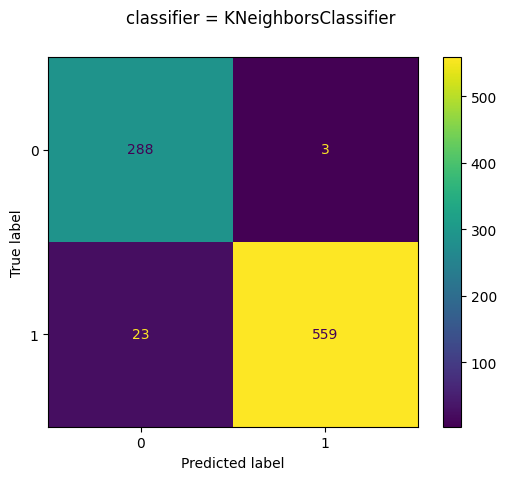

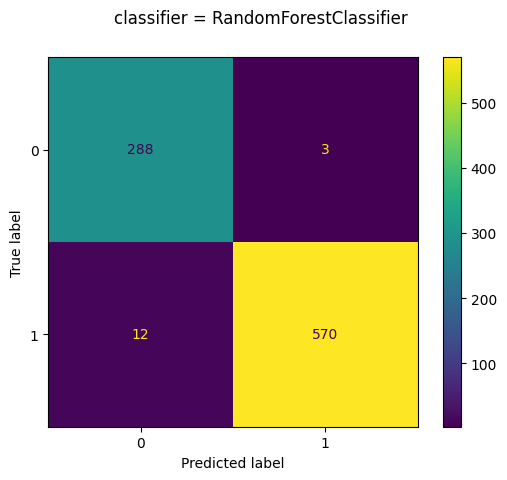

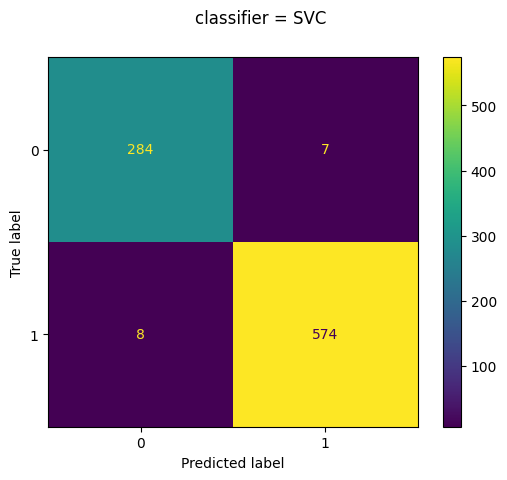

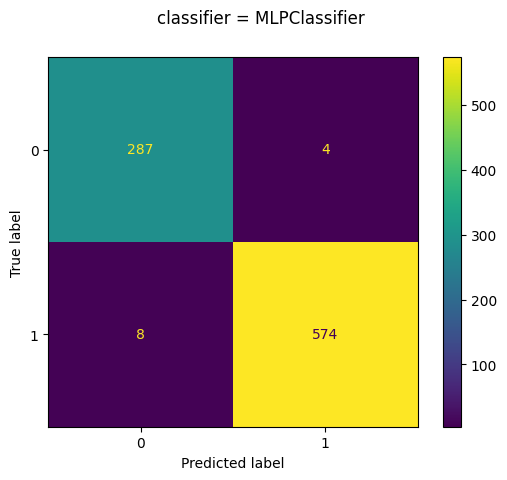

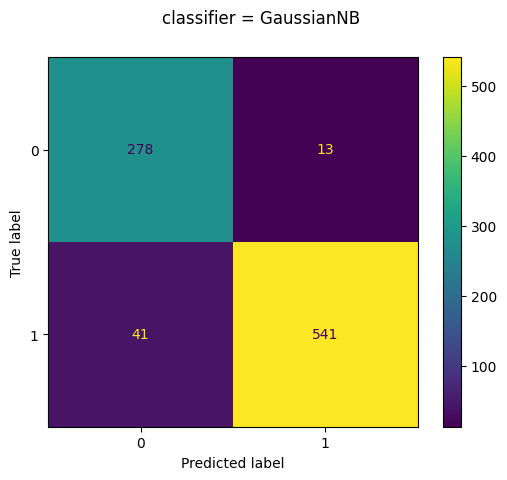

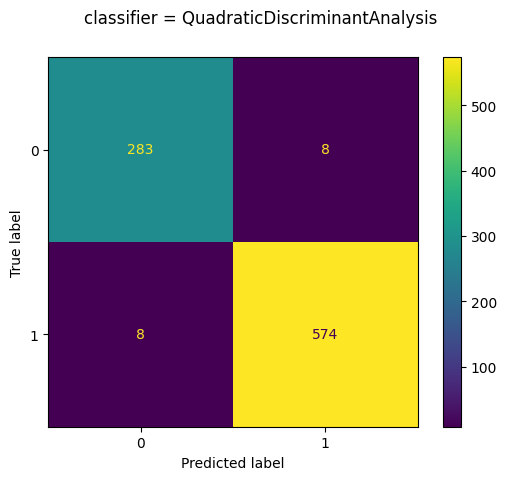

In [66]:
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_res, y_res = pipeline.fit_resample(X, y)
X_tr, X_te, y_tr, y_te = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

for cls in classes:
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)
    model = cls()
    model.fit(X_tr, y_tr)
    y_pr = model.predict(X_te)
    cm = confusion_matrix(y_te, y_pr, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.suptitle(f'classifier = {cls.__name__}')
    plt.savefig(f'macierz_pomylek_{cls.__name__}_zadanie_9.png')